# Exploratory Data analysis of Employees dataset



In [3]:
#Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Read dataset using pandas
df = pd.read_csv(r"C:\Users\excel\Downloads\employees.csv")
# first five rows of the data
df.head(2)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN


In [5]:
# last 5 rows of the data
df.tail(2)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


In [6]:
df.dtypes

First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [7]:
# columns information 
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [8]:
# number of rows and columns
df.shape

(1000, 8)

In [7]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [8]:
df[['First Name','Gender','Team']]

,First Name,Gender,Team
0,Douglas,Male,Marketing
1,Thomas,Male,NaN
2,Maria,Female,Finance
3,Jerry,Male,Finance
4,Larry,Male,Client Services
...,...,...,...
995,Henry,NaN,Distribution
996,Phillip,Male,Finance
997,Russell,Male,Product
998,Larry,Male,Business Development


In [31]:
# convert "Start Date" column to datetime data type
df['Start Date'] = pd.to_datetime(df['Start Date'], format='mixed') # '%y/%m/%d

In [10]:
df['Start Date'].head(3)

0   1993-08-06
1   1996-03-31
2   1993-04-23
Name: Start Date, dtype: datetime64[ns]

In [32]:
df['First Name'] = df['First Name'].astype('string') 

In [33]:
df['Gender'] = df['Gender'].astype('string') 
df['Senior Management'] = df['Senior Management'].astype(bool) 
df['Team'] = df['Team'].astype('string') 

In [16]:
# data type for multiple column
df.dtypes

First Name           string[python]
Gender               string[python]
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus %                     float64
Senior Management              bool
Team                 string[python]
dtype: object

In [34]:
# renameing the columns
columns = {'First Name':'First_Name', 
           'Start Date':'Start_date', 
           'Last Login Time':'Last_Login_Time', 
            'Bonus %':'Bonus_perct', 
           'Senior Management':'Senior_Management'}
df.rename(columns = columns, inplace=True)

In [18]:
df.columns, df.shape

(Index(['First_Name', 'Gender', 'Start_date', 'Last_Login_Time', 'Salary',
        'Bonus_perct', 'Senior_Management', 'Team'],
       dtype='object'),
 (1000, 8))

In [24]:
name = df['First_Name'].str.lower()
name.nunique()

201

In [25]:
# checking for uniques values in every column
df.nunique()

First_Name           201
Gender                 3
Start_date           972
Last_Login_Time      720
Salary               995
Bonus_perct          971
Senior_Management      2
Team                  11
dtype: int64

In [35]:
# checking for unique value count in a column.
df['Gender'].value_counts()

Gender
Female    431
Male      424
Name: count, dtype: Int64

In [36]:
df['Senior_Management'].value_counts()

Senior_Management
True     535
False    465
Name: count, dtype: int64

In [37]:
df['Team'].value_counts()

Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: Int64

# Handling Missing Values:
    
1. isnull() # checking for missing values
2. notnull()# checking for  values
3. dropna() # deleting a missing values
4. fillna() # filling a missing value by other value
5. bfill() # backward filling
6. ffill() # forward filling value
7. replace() #  replacing inplace of missing data.
8. interpolate() # predicting the value for missing value.

In [38]:
df.isnull().sum() #, df.isna().sum()

First_Name            67
Gender               145
Start_date             0
Last_Login_Time        0
Salary                 0
Bonus_perct            0
Senior_Management      0
Team                  43
dtype: int64

In [21]:
# df.isna().sum()

First_Name            67
Gender               145
Start_date             0
Last_Login_Time        0
Salary                 0
Bonus_perct            0
Senior_Management      0
Team                  43
dtype: int64

In [20]:
# df.notnull().sum()

First_Name            933
Gender                855
Start_date           1000
Last_Login_Time      1000
Salary               1000
Bonus_perct          1000
Senior_Management    1000
Team                  957
dtype: int64

In [39]:
df["Gender"].fillna("No Gender", inplace = True)

C:\Users\excel\AppData\Local\Temp\ipykernel_1092\2149486096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("No Gender", inplace = True)


In [26]:
# mode = df['Senior_Management'].mode()[0]
# df['Senior_Management'] = df['Senior_Management'].replace(np.nan, mode)

In [41]:
# axis = 0 --> rowise, Axis =1 --> columns wise
df = df.dropna(axis = 0, how ='any') 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First_Name         899 non-null    string        
 1   Gender             899 non-null    string        
 2   Start_date         899 non-null    datetime64[ns]
 3   Last_Login_Time    899 non-null    object        
 4   Salary             899 non-null    int64         
 5   Bonus_perct        899 non-null    float64       
 6   Senior_Management  899 non-null    bool          
 7   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1), string(3)
memory usage: 57.1+ KB


In [46]:
df = df.reset_index()

In [48]:
# dropping index column
df.drop(['index'],axis = 1,inplace = True)

In [49]:
df.head()

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
2,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
3,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services
4,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal


In [34]:
# creating new column.
df['Final_salary'] = round(df['Salary'] + ((df['Salary'] * df['Bonus_perct'])/100),2)
df['Final_salary']

0      104066.04
1      146075.36
2      151660.05
3      102406.95
4      126823.25
         ...    
894    154548.04
895     50732.63
896     98291.15
897     67750.92
898    143163.51
Name: Final_salary, Length: 899, dtype: float64

In [35]:
df.head()

,First_Name,Gender,Start_date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team,Final_salary
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing,104066.04
1,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance,146075.36
2,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance,151660.05
3,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services,102406.95
4,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal,126823.25


# outlier detection

<Axes: >

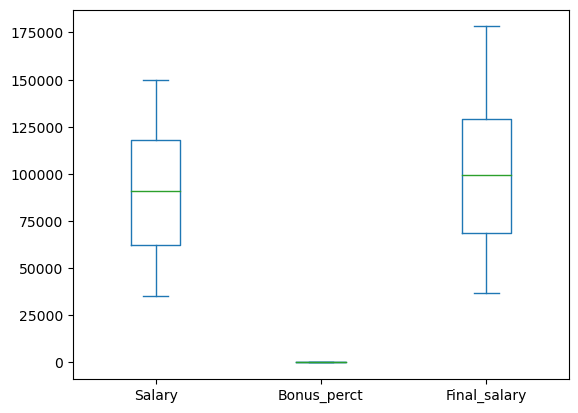

In [36]:
df.plot(kind = 'box')

In [38]:
# inter quartile range values[lower quartile, upper quartile]
Q1_salary = np.quantile(df['Salary'],0.25)
print('Q1:',Q1_salary)
Q2_salary = np.quantile(df['Salary'],0.50)
print('Q2',Q2_salary)
Q3_salary = np.quantile(df['Salary'],0.75)
print('Q3',Q3_salary)
df['Salary'].describe()

Q1: 62412.5
Q2 90730.0
Q3 118107.5


count       899.000000
mean      90479.672970
std       32743.875488
min       35013.000000
25%       62412.500000
50%       90730.000000
75%      118107.500000
max      149908.000000
Name: Salary, dtype: float64

In [39]:
IQR = (Q3_salary - Q1_salary)/2
print("IQR: ", IQR)
Upper = Q3_salary+1.5*IQR
lower =  Q1_salary-1.5*IQR  
[lower,Upper]

IQR:  27847.5


[20641.25, 159878.75]

In [40]:
df['Final_salary'].min(),df['Final_salary'].max()

(36858.93, 178258.6)

# Data visualization
Data Visualization is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data.

Matplotlib 
Python Seaborn 

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
# numerical summary statistics
df.describe()

,Start_date,Salary,Bonus_perct,Final_salary
count,899,899.000000,899.000000,899.000000
mean,1998-11-19 19:53:19.555061120,90479.672970,10.200201,99677.876407
min,1980-01-19 00:00:00,35013.000000,1.015000,36858.930000
25%,1990-03-21 12:00:00,62412.500000,5.267000,68798.985000
50%,1999-08-06 00:00:00,90730.000000,9.770000,99308.000000
75%,2007-09-22 00:00:00,118107.500000,14.868500,129095.255000
max,2016-07-15 00:00:00,149908.000000,19.944000,178258.600000
std,NaN,32743.875488,5.551621,36400.444846


In [ ]:
# categorical summmary stats
df.describe(include = ['string','bool'])

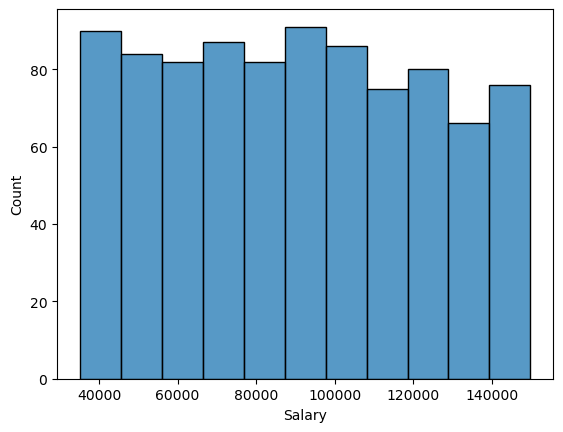

In [42]:
# importing packages
sns.histplot(x='Salary', data=df )
plt.show()

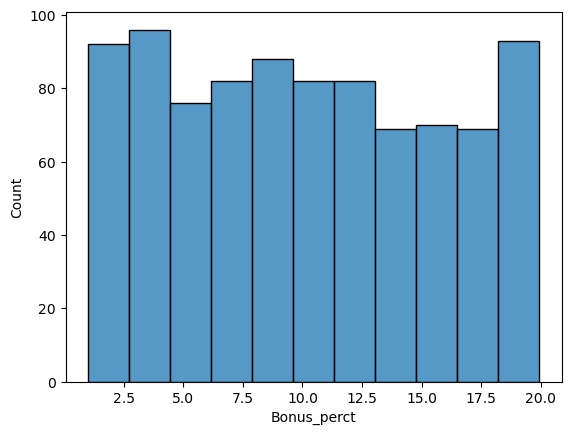

In [43]:
sns.histplot(x='Bonus_perct', data=df )
plt.show()

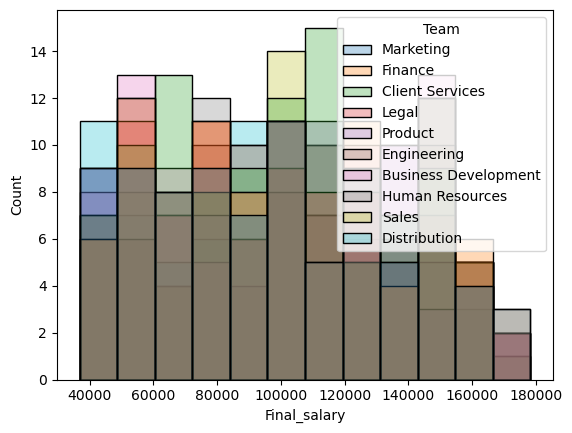

In [51]:
sns.histplot(x='Final_salary', hue = 'Gender',data=df ,alpha = 0.3)
plt.show()

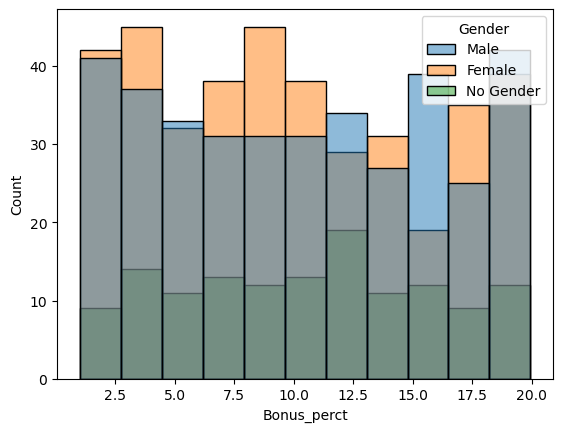

In [45]:
sns.histplot(x = 'Bonus_perct',hue = 'Gender',data = df)
plt.show()

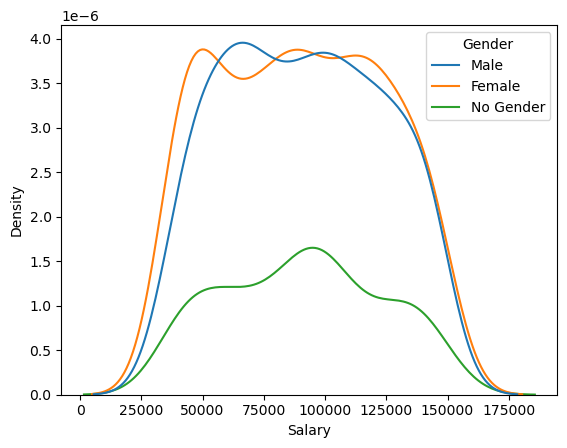

In [46]:
sns.kdeplot(x="Salary", hue = 'Gender',data=df )
plt.show()

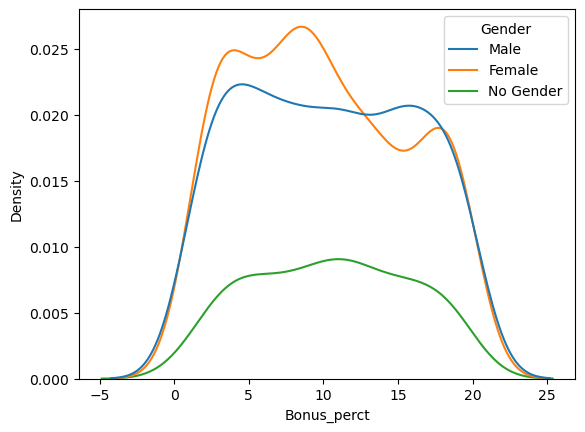

In [47]:
sns.kdeplot(x="Bonus_perct", hue='Gender', data=df )
plt.show()

# Relationship of variables

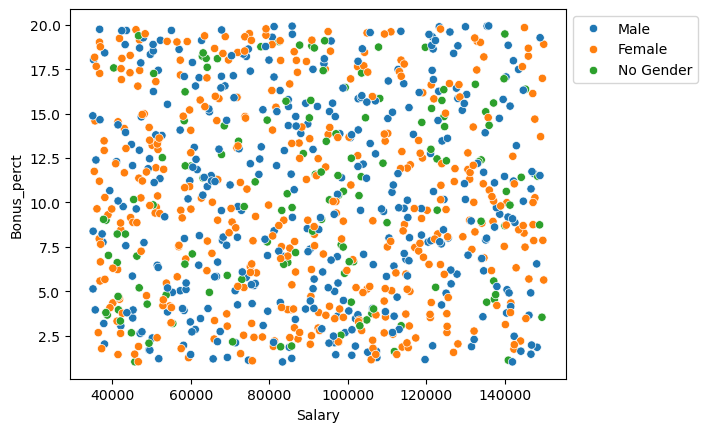

In [53]:
# Relationship of variables
sns.scatterplot(x="Salary", y='Bonus_perct', data=df,hue= 'Gender')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [54]:
df['Salary'].corr(df['Bonus_perct'])

-0.01702025486966284

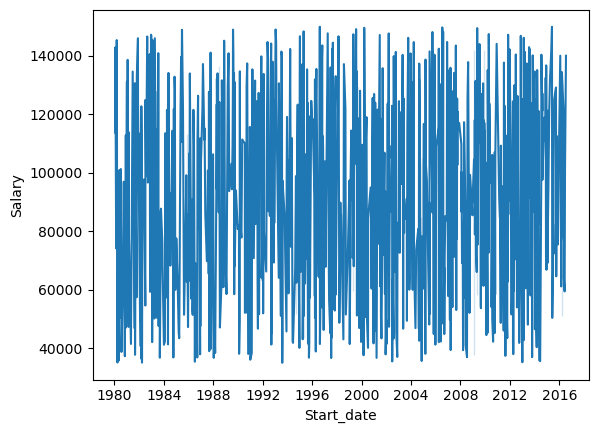

In [63]:
sns.lineplot(x='Start_date',y = 'salary',data = df)
plt.show()

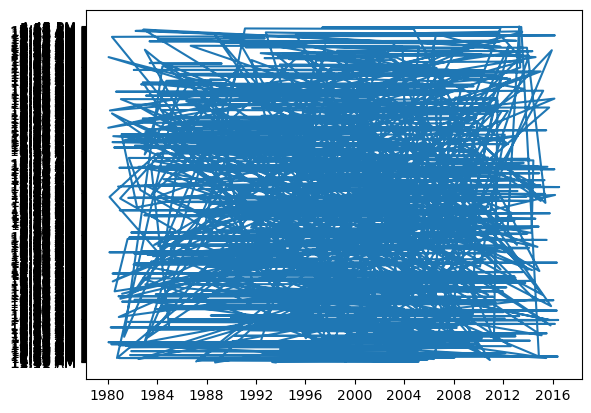

In [55]:
plt.plot(df['Start_date'],df['Last_Login_Time'])
plt.show()

# Task: line chart on salary and startdate by team or gender.

In [ ]:
df['cabin'].ffill()
df['cabin'].bfill()

In [70]:
0.45+0.36+0.39+0.22

1.4200000000000002

In [56]:
titanic_df= pd.read_csv(r"D:\DS-Batch1\DS dataset\train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       2
dtype: int64

In [62]:
titanic_df['Cabin'].ffill(inplace=True)

In [65]:
titanic_df['Cabin'].bfill(inplace=True)

In [66]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [58]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [100]:
survived_df = titanic_df[titanic_df['Survived'] == 1]
survived_df['Age'].max()

80.0

In [60]:
survived_df['Age'] = survived_df['Age'].astype('int')
len(survived_df)

NameError: name 'survived_df' is not defined

In [93]:
age_df = survived_df[(survived_df['Age']>0) & (survived_df['Age']<=20)]
age_0_20 = len(age_df)/len(survived_df)
age_0_20

0.21929824561403508

In [95]:
age_df_40 = survived_df[(survived_df['Age']>20) & (survived_df['Age']<=40)]
age_20_40 = len(age_df_40)/len(survived_df)
age_20_40

0.5994152046783626

In [96]:
age_df_60 = survived_df[(survived_df['Age']>40) & (survived_df['Age']<=60)]
age_40_60 = len(age_df_60)/len(survived_df)
age_40_60

0.14619883040935672

In [101]:
age_df_90 = survived_df[(survived_df['Age']>60) & (survived_df['Age']<=80)]
age_60_80 = len(age_df_90)/len(survived_df)
age_60_80

0.014619883040935672

In [99]:
age_0_20+age_20_40+age_40_60+age_60_80

0.9795321637426901

# Handling Outliers

In [ ]:
# Load the dataset
df = sns.load_dataset("iris")
print(df.head())

In [ ]:
df['species'].value_counts()

In [ ]:
sns.get_dataset_names()

In [ ]:
sns.boxplot(data=df)

In [ ]:
df.shape

In [ ]:
# IQR
Q1 = np.percentile(df['sepal_width'], 25, method = 'midpoint')
Q3 = np.percentile(df['sepal_width'], 75, method = 'midpoint')
# print(Q1,Q3)
IQR = (Q3 - Q1)
print("Old Shape: ", df.shape)
Upper = Q3+1.5*IQR
# print(Upper)
lower =  Q1-1.5*IQR  
# print(lower)
[lower,Upper]

In [ ]:
df['sepal_width'].min(),df['sepal_width'].max()

In [ ]:
# Upper bound
max_Upper_value = np.where(df['sepal_width'] >= Upper)
print(max_Upper_value[0]) 

In [ ]:
# Lower bound
min_Lower_value = np.where(df['sepal_width'] <= lower)
print(min_Lower_value)

In [ ]:
# df.head(35)

In [ ]:
df.drop(min_Lower_value[0], inplace = True)

In [ ]:
df.drop(max_Upper_value[0], inplace = True)

In [ ]:
print("New Shape: ", df.shape)

In [ ]:
sns.boxplot(data=df)

In [ ]:
sns.boxplot(x='sepal_length', data=df)

In [ ]:
sns.boxplot(x='petal_length', data=df)

In [ ]:
sns.boxplot(x='petal_width', data=df)

In [ ]:
sns.pairplot(df)

In [ ]:
sample_df = pd.read_excel(r"C:\Users\excel\DATA Science\Datasets\Sample - Superstore.xls",sheet_name='People')
sample_df

In [ ]:
sample_df.shape

In [ ]:
!pip install xlrd